Phân cụm khách hàng – Mall Customers Dataset
Mục tiêu: Phân nhóm khách hàng để tối ưu hóa chiến lược Marketing.
Phương pháp: Sử dụng K-Means clustering với k = 3, 4, 5
Biến phân tích: Annual Income và Spending Score

I. CHUẨN BỊ MÔI TRƯỜNG VÀ DỮ LIỆU

1. Import thư viện

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

plt.style.use('ggplot')
sns.set_style('whitegrid')


Để thực hiện phân tích và xây dựng mô hình phân cụm, các thư viện Python sau đã được sử dụng:

**1. Pandas & NumPy:**
- `pandas`: Đọc và xử lý dữ liệu dạng bảng từ file CSV
- `numpy`: Thực hiện các phép toán số học trên mảng và ma trận

**2. Matplotlib & Seaborn:**
- `matplotlib.pyplot`: Vẽ biểu đồ cơ bản, tùy chỉnh style và layout
- `seaborn`: Tạo biểu đồ thống kê đẹp mắt, đặc biệt là scatter plot để hiển thị các cụm khách hàng
- `plt.style.use('ggplot')` và `sns.set_style('whitegrid')`: Thiết lập style cho biểu đồ chuyên nghiệp

**3. Scikit-learn (sklearn):**
- `KMeans` (từ sklearn.cluster): Thuật toán phân cụm K-Means, nhóm khách hàng dựa trên độ tương đồng
- `StandardScaler` (từ sklearn.preprocessing): Chuẩn hóa dữ liệu về cùng thang đo (mean=0, std=1) để đảm bảo các biến có trọng số công bằng trong quá trình phân cụm

2. Đọc dữ liệu

In [2]:
data = pd.read_csv('../data/Mall_Customers.csv')
print("Số dòng:", len(data))
print("Các cột:", data.columns.tolist())

Số dòng: 200
Các cột: ['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']


- Sử dụng hàm `pd.read_csv()` của pandas để đọc file CSV 'Mall_Customers.csv'
- Dữ liệu được lưu vào DataFrame có tên `df` (viết tắt của dataframe)
- `len(df)`: Đếm số lượng dòng (số lượng khách hàng) trong dataset
- In ra tổng số quan sát trong dữ liệu
- `df.columns`: Lấy tên các cột (các thuộc tính) của DataFrame
- `.tolist()`: Chuyển đổi sang dạng list Python để dễ đọc
- In ra danh sách các biến có trong dataset (VD: CustomerID, Gender, Age, Annual Income, Spending Score, v.v.)

II. TIỀN XỬ LÝ DỮ LIỆU

1. Khám phá dữ liệu ban đầu

In [3]:
data.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


Hiển thị 5 dòng đầu tiên của DataFrame để xem cấu trúc và nội dung dữ liệu.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Hiển thị thông tin tổng quan về DataFrame:

**Thông tin bao gồm:**
- **Số lượng dòng và cột**: Kích thước của dataset
- **Tên các cột**: Danh sách tất cả các biến
- **Kiểu dữ liệu**: dtype của từng cột (int64, float64, object...)
- **Số lượng giá trị không null**: Giúp phát hiện missing values
- **Bộ nhớ sử dụng**: Memory usage của DataFrame

**Mục đích:**
- Kiểm tra cấu trúc và kiểu dữ liệu của các biến
- Phát hiện missing values (số non-null < tổng số dòng)
- Đánh giá kích thước và bộ nhớ của dataset

In [5]:
data.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Tạo bảng thống kê mô tả cho các cột số (numeric columns):

- **count**: Số lượng giá trị (không null)
- **mean**: Giá trị trung bình
- **std**: Độ lệch chuẩn (standard deviation) - đo độ phân tán dữ liệu
- **min**: Giá trị nhỏ nhất
- **25%**: Phân vị thứ 25 (quartile 1)
- **50%**: Phân vị thứ 50 (median - trung vị)
- **75%**: Phân vị thứ 75 (quartile 3)
- **max**: Giá trị lớn nhất

**Mục đích:**
- Hiểu phân phối và khoảng giá trị của từng biến
- Phát hiện outliers (giá trị bất thường)
- So sánh độ phân tán giữa Age, Annual Income, và Spending Score

tạo bảng thống kê mô tả cho các cột số (numeric columns):

Các chỉ số thống kê bao gồm:

count: Số lượng giá trị (không null)
mean: Giá trị trung bình
std: Độ lệch chuẩn (standard deviation) - đo độ phân tán
min: Giá trị nhỏ nhất
25%: Phân vị thứ 25 (quartile 1)
50%: Phân vị thứ 50 (median - trung vị)
75%: Phân vị thứ 75 (quartile 3)
max: Giá trị lớn nhất
Mục đích:

Hiểu phân phối dữ liệu
Phát hiện outliers (giá trị bất thường)
So sánh khoảng giá trị giữa các biến (Age, Annual Income, Spending Score)

2. Kiểm tra & xử lý missing values

In [6]:
missing_values = data.isnull().sum()
missing_percent = (data.isnull().sum() / len(data)) * 100
missing_info = pd.DataFrame({
    'Số lượng giá trị thiếu': missing_values,
    'Tỷ lệ phần trăm': missing_percent
})
print(missing_info)
print("\n")

# Kiểm tra giá trị thiếu
print("Missing values trước khi xử lý:")
print(data.isnull().sum())

data = data.dropna()   

print("\nMissing values sau khi xử lý:")
print(data.isnull().sum())

                        Số lượng giá trị thiếu  Tỷ lệ phần trăm
CustomerID                                   0              0.0
Gender                                       0              0.0
Age                                          0              0.0
Annual Income (k$)                           0              0.0
Spending Score (1-100)                       0              0.0


Missing values trước khi xử lý:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

Missing values sau khi xử lý:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


**Kiểm tra và xử lý giá trị thiếu (Missing Values):**

**Bước 1: Thống kê giá trị thiếu**
- `data.isnull().sum()`: Đếm số lượng giá trị thiếu trong mỗi cột
- `missing_percent`: Tính tỷ lệ % giá trị thiếu so với tổng số dòng
- Tạo DataFrame `missing_info` để hiển thị cả số lượng và tỷ lệ phần trăm

**Bước 2: Kiểm tra trước và sau xử lý**
- In ra số lượng missing values trước khi xử lý
- Sử dụng `data.dropna()` để loại bỏ các dòng có giá trị thiếu
- In ra kết quả sau khi xử lý để xác nhận

**Kết quả với Mall Customers Dataset:**
- Dataset này **KHÔNG có giá trị thiếu** (all columns have 200 non-null values)
- `dropna()` không loại bỏ dòng nào nhưng đảm bảo dữ liệu sạch
- Đây là một dataset chất lượng cao, sẵn sàng cho phân tích và modeling


3. Kiểm tra dữ liệu ngoại lai

In [7]:
# Kiểm tra ngoại lai (IQR)
cot_so_can_kiem_tra = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
tong_so_hang = len(data)

print("Các giá trị và phần trăm ngoại lai:")

for cot in cot_so_can_kiem_tra:
    series_so = data[cot].dropna()

    Q1 = series_so.quantile(0.25)
    Q3 = series_so.quantile(0.75)
    IQR = Q3 - Q1
    gioi_han_duoi = Q1 - 1.5 * IQR
    gioi_han_tren = Q3 + 1.5 * IQR

    ngoai_lai = data[(data[cot] < gioi_han_duoi) | (data[cot] > gioi_han_tren)]
    so_luong_ngoai_lai = len(ngoai_lai)
    ty_le_ngoai_lai = (so_luong_ngoai_lai / tong_so_hang) * 100

    print(f"Cột {cot}: {so_luong_ngoai_lai} ngoại lai ({ty_le_ngoai_lai:.2f}%)")
    if not ngoai_lai.empty:
        print("5 giá trị ngoại lai đầu tiên:")
        print(ngoai_lai[cot].head().to_string())


Các giá trị và phần trăm ngoại lai:
Cột Age: 0 ngoại lai (0.00%)
Cột Annual Income (k$): 2 ngoại lai (1.00%)
5 giá trị ngoại lai đầu tiên:
198    137
199    137
Cột Spending Score (1-100): 0 ngoại lai (0.00%)


**Phát hiện giá trị ngoại lai (Outliers) bằng phương pháp IQR:**

**Phương pháp IQR (Interquartile Range):**
- **Q1 (Quartile 1)**: Phân vị thứ 25 - `quantile(0.25)`
- **Q3 (Quartile 3)**: Phân vị thứ 75 - `quantile(0.75)`
- **IQR**: Khoảng tứ phân vị = Q3 - Q1
- **Ngưỡng ngoại lai**:
  - Giới hạn dưới = Q1 - 1.5 × IQR
  - Giới hạn trên = Q3 + 1.5 × IQR

**Quy trình kiểm tra:**
1. Lặp qua 3 biến số: Age, Annual Income, Spending Score
2. Tính Q1, Q3, IQR và ngưỡng trên/dưới cho mỗi biến
3. Lọc các giá trị nằm ngoài khoảng `[gioi_han_duoi, gioi_han_tren]`
4. Tính số lượng và tỷ lệ % ngoại lai so với tổng số dòng
5. Hiển thị 5 giá trị ngoại lai đầu tiên (nếu có)

**Ý nghĩa:**
- Ngoại lai có thể là dữ liệu lỗi hoặc các trường hợp đặc biệt cần xem xét
- Với clustering, ngoại lai có thể ảnh hưởng đến việc hình thành cụm
- Tùy tình huống, có thể giữ lại hoặc loại bỏ ngoại lai

4. Chọn các biến phân cụm

In [8]:
X = data[['Annual Income (k$)', 'Spending Score (1-100)']]

print("\n--- Dữ liệu đã chọn cho Phân cụm (X) ---")
X.head()


--- Dữ liệu đã chọn cho Phân cụm (X) ---


,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


**Lựa chọn biến cho phân cụm (Feature Selection):**

**Biến được chọn:**
- `Annual Income (k$)`: Thu nhập hàng năm (đơn vị: nghìn USD)
- `Spending Score (1-100)`: Điểm chi tiêu (thang đo từ 1-100)

**Lý do chọn 2 biến này:**
1. **Liên quan trực tiếp đến hành vi tiêu dùng**: Thu nhập và xu hướng chi tiêu là yếu tố cốt lõi để phân khúc khách hàng
2. **Dễ trực quan hóa**: 2 chiều (2D) cho phép vẽ scatter plot để quan sát các cụm rõ ràng
3. **Ý nghĩa kinh doanh**: Giúp xác định các nhóm như:
   - Thu nhập cao - Chi tiêu cao (VIP customers)
   - Thu nhập cao - Chi tiêu thấp (Tiết kiệm)
   - Thu nhập thấp - Chi tiêu cao (Mua sắm vượt khả năng)
   - Thu nhập thấp - Chi tiêu thấp (Phân khúc cơ bản)


5. Chuẩn hóa dữ liệu

In [9]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled_data = pd.DataFrame(X_scaled, columns=X.columns)

print("\n--- Dữ liệu đã được Chuẩn hóa (Standard Scaled) ---")
X_scaled_data.head()


--- Dữ liệu đã được Chuẩn hóa (Standard Scaled) ---


,Annual Income (k$),Spending Score (1-100)
0,-1.738999,-0.434801
1,-1.738999,1.195704
2,-1.700830,-1.715913
3,-1.700830,1.040418
4,-1.662660,-0.395980


**Chuẩn hóa dữ liệu (Data Standardization):**

**Khởi tạo và áp dụng StandardScaler:**
- `scaler = StandardScaler()`: Tạo đối tượng chuẩn hóa
- `fit_transform(X)`: Học các tham số (mean, std) từ dữ liệu và biến đổi ngay lập tức
- Chuyển đổi kết quả thành DataFrame để dễ quan sát

**Công thức chuẩn hóa:**
$$z = \frac{x - \mu}{\sigma}$$

Trong đó:
- $x$: Giá trị gốc
- $\mu$: Giá trị trung bình (mean)
- $\sigma$: Độ lệch chuẩn (standard deviation)
- $z$: Giá trị sau chuẩn hóa

**Kết quả sau chuẩn hóa:**
- **Mean = 0**: Trung bình của mỗi biến = 0
- **Standard Deviation = 1**: Độ lệch chuẩn = 1
- Tất cả biến có cùng thang đo, tránh bias do đơn vị khác nhau

PHƯƠNG PHÁP ELBOW (TÙY CHỌN/ BỔ SUNG)

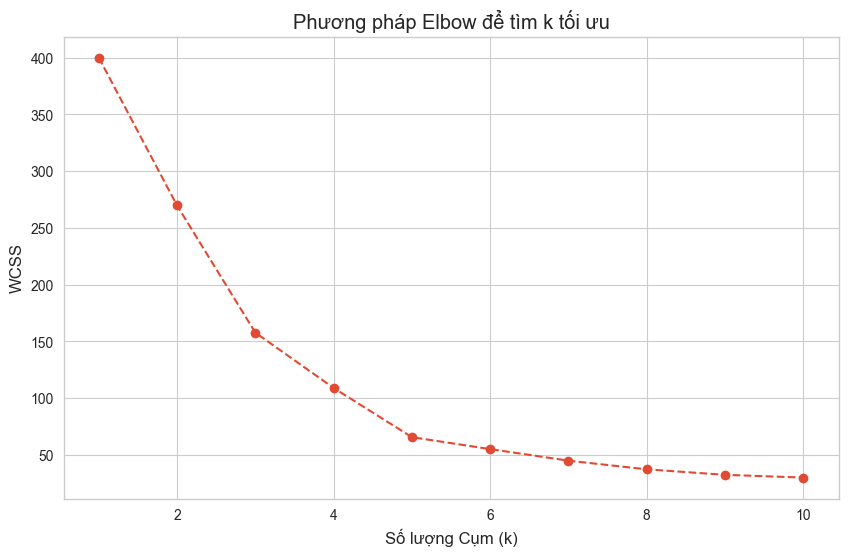

In [10]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Phương pháp Elbow để tìm k tối ưu')
plt.xlabel('Số lượng Cụm (k)')
plt.ylabel('WCSS')
plt.show()

**Giải thích Phương pháp Elbow:**

**Mục đích:**
Phương pháp Elbow giúp xác định số lượng cụm tối ưu (k) bằng cách quan sát sự thay đổi của **WCSS (Within-Cluster Sum of Squares)** - tổng bình phương khoảng cách từ các điểm đến tâm cụm của chúng.

**Cách đọc biểu đồ:**
- **Trục hoành**: Số lượng cụm (k) từ 1 đến 10
- **Trục tung**: Giá trị WCSS (càng thấp càng tốt)
- **Đường biểu diễn**: Cho thấy WCSS giảm dần khi k tăng

**Nhận xét từ biểu đồ:**

1. **Giai đoạn giảm mạnh (k = 1 đến 5):**
   - Khi k tăng từ 1 đến 3, giá trị WCSS **giảm rất mạnh**
   - Điều này cho thấy việc chia nhỏ dữ liệu mang lại **hiệu quả lớn**
   - Mỗi cụm mới giúp giảm đáng kể độ phân tán trong cụm

2. **"Khuỷu tay" tại k=5:**
   - Tại vị trí **k=5**, đồ thị tạo thành một **"khuỷu tay" (elbow)** rõ rệt
   - Đây là điểm uốn quan trọng của đường cong
   - Sau điểm này, đường cong trở nên thoải hơn

3. **Giai đoạn giảm chậm (k > 5):**
   - Từ k=5 trở đi, việc tăng thêm số cụm (k=6, 7, 8...) chỉ làm giảm WCSS **không đáng kể**
   - Độ dốc của đường cong giảm rõ rệt
   - Lợi ích thu được không xứng đáng với độ phức tạp tăng lên

**Nguyên tắc lựa chọn k:**
- Chọn điểm "khuỷu tay" - nơi WCSS bắt đầu giảm chậm
- Cân bằng giữa **độ chính xác** (WCSS thấp) và **tính đơn giản** (k nhỏ)
- Tránh overfitting (quá nhiều cụm không cần thiết)

** Kết luận:**
**k=5 là giá trị tối ưu** để cân bằng giữa:
- Độ chính xác trong phân cụm (WCSS đủ thấp)
- Tính đơn giản và khả năng triển khai thực tế
- Không tạo ra quá nhiều cụm phức tạp và khó quản lý

6. Thực hiện K-Means với K = 3, 4, 5

In [11]:
k3 = 3
kmeans_k3 = KMeans(n_clusters=k3, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_k3 = kmeans_k3.fit_predict(X_scaled)

data['Cluster_k3'] = clusters_k3

print(f"\n--- Phân cụm với k={k3} hoàn thành. ---")
data['Cluster_k3'].value_counts()


--- Phân cụm với k=3 hoàn thành. ---


Cluster_k3
2    123
1     39
0     38
Name: count, dtype: int64

**Phân cụm K-Means với k=3:**

**Các tham số của KMeans:**
- `n_clusters=3`: Số lượng cụm mong muốn
- `init='k-means++'`: Phương pháp khởi tạo centroid thông minh
  - Chọn centroids ban đầu cách xa nhau → hội tụ nhanh hơn và kết quả tốt hơn
  - Thay vì random hoàn toàn
- `max_iter=300`: Số lần lặp tối đa
- `n_init=10`: Chạy thuật toán 10 lần với các centroids khởi tạo khác nhau, chọn kết quả tốt nhất
- `random_state=42`: Seed để đảm bảo kết quả có thể tái tạo (reproducibility)

**Quy trình thực hiện:**
1. `fit_predict(X_scaled)`: Huấn luyện mô hình và dự đoán nhãn cụm cho từng khách hàng
2. Gán nhãn cụm vào cột mới `Cluster_k3` trong DataFrame gốc
3. `value_counts()`: Đếm số lượng khách hàng trong mỗi cụm

**Kết quả:**
- Mỗi khách hàng được gán vào 1 trong 3 cụm (0, 1, 2)
- Phân bố số lượng khách hàng giữa các cụm được hiển thị
- Có thể phân tích đặc điểm của từng cụm dựa trên Annual Income và Spending Score

In [12]:
k4 = 4
kmeans_k4 = KMeans(n_clusters=k4, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_k4 = kmeans_k4.fit_predict(X_scaled)
data['Cluster_k4'] = clusters_k4

print(f"\n--- Phân cụm với k={k4} hoàn thành. ---")
data['Cluster_k4'].value_counts()


--- Phân cụm với k=4 hoàn thành. ---


Cluster_k4
2    100
3     39
1     38
0     23
Name: count, dtype: int64

**Phân cụm K-Means với k=4:**

tương tự k = 3 

**Kết quả:**
- Mỗi khách hàng được gán vào 1 trong 4 cụm (0, 1, 2, 3)
- Phân bố số lượng khách hàng giữa các cụm được hiển thị
- Có thể so sánh với k=3 để đánh giá mô hình phân cụm tốt hơn

In [13]:
k5 = 5
kmeans_k5 = KMeans(n_clusters=k5, init='k-means++', max_iter=300, n_init=10, random_state=42)
clusters_k5 = kmeans_k5.fit_predict(X_scaled)
data['Cluster_k5'] = clusters_k5

print(f"\n--- Phân cụm với k={k5} hoàn thành. ---")
data['Cluster_k5'].value_counts()


--- Phân cụm với k=5 hoàn thành. ---


Cluster_k5
0    81
1    39
3    35
4    23
2    22
Name: count, dtype: int64

**Phân cụm K-Means với k=5:**

tương tự k = 3, 4

**Kết quả:**
- Mỗi khách hàng được gán vào 1 trong 5 cụm (0, 1, 2, 3, 4)
- Phân bố số lượng khách hàng giữa các cụm được hiển thị
- Có thể so sánh với k=3, k=4 để chọn số cụm tối ưu thông qua Elbow method hoặc Silhouette score

7. Vẽ biểu đồ phân cụm

7.1. Hàm trực quan hóa

In [14]:
def plot_clusters(data, cluster_col, title, centers=None):
    """Vẽ biểu đồ Scatter thể hiện các cụm."""
    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x='Annual Income (k$)',
        y='Spending Score (1-100)',
        hue=cluster_col,
        palette='viridis',
        data=data,
        s=100,
        alpha=0.7,
        legend='full'
    )

    if centers is not None:
        centers_original = scaler.inverse_transform(centers)
        plt.scatter(
            centers_original[:, 0], # Annual Income
            centers_original[:, 1], # Spending Score
            marker='X',
            s=300,
            c='red',
            label='Tâm Cụm (Centroids)'
        )

    plt.title(title)
    plt.xlabel('Annual Income (k$)')
    plt.ylabel('Spending Score (1-100)')
    plt.legend(title='Cụm Khách hàng')
    plt.show()

**Hàm vẽ biểu đồ phân cụm (Cluster Visualization):**

**Mục đích:**
Tạo hàm tái sử dụng để trực quan hóa kết quả phân cụm với scatter plot, hiển thị các cụm khách hàng và tâm cụm (centroids).

**Tham số của hàm:**
- `data`: DataFrame chứa dữ liệu và nhãn cụm
- `cluster_col`: Tên cột chứa nhãn cụm (ví dụ: 'Cluster_k3', 'Cluster_k4')
- `title`: Tiêu đề của biểu đồ
- `centers`: Ma trận tọa độ tâm cụm (optional) - nếu có sẽ vẽ centroids

**Các bước thực hiện:**

**1. Vẽ scatter plot cho các cụm:**
- `figsize=(12, 8)`: Kích thước biểu đồ 12x8 inches
- `sns.scatterplot()`: Vẽ điểm phân tán với màu sắc theo cụm
  - `x`, `y`: Trục tọa độ (Annual Income, Spending Score)
  - `hue=cluster_col`: Màu sắc theo nhãn cụm
  - `palette='viridis'`: Bảng màu gradient đẹp mắt
  - `s=100`: Kích thước điểm
  - `alpha=0.7`: Độ trong suốt 70% để nhìn thấy điểm chồng lấp

**2. Vẽ centroids (nếu có):**
- `scaler.inverse_transform(centers)`: Chuyển tâm cụm từ dữ liệu chuẩn hóa về thang đo gốc
- `plt.scatter()` với `marker='X'`: Vẽ centroids dạng chữ X màu đỏ, kích thước lớn (s=300)
- Centroids là tâm của mỗi cụm, điểm trung tâm mà K-Means tìm được

**3. Tùy chỉnh biểu đồ:**
- `plt.title()`: Tiêu đề
- `plt.xlabel()`, `plt.ylabel()`: Nhãn trục
- `plt.legend()`: Chú thích các cụm
- `plt.show()`: Hiển thị biểu đồ

**Ý nghĩa:**
Hàm này giúp nhanh chóng so sánh kết quả phân cụm với k=3, 4, 5 mà không cần lặp lại code.

7.2 Vẽ biểu đồ của k = 3, 4, 5

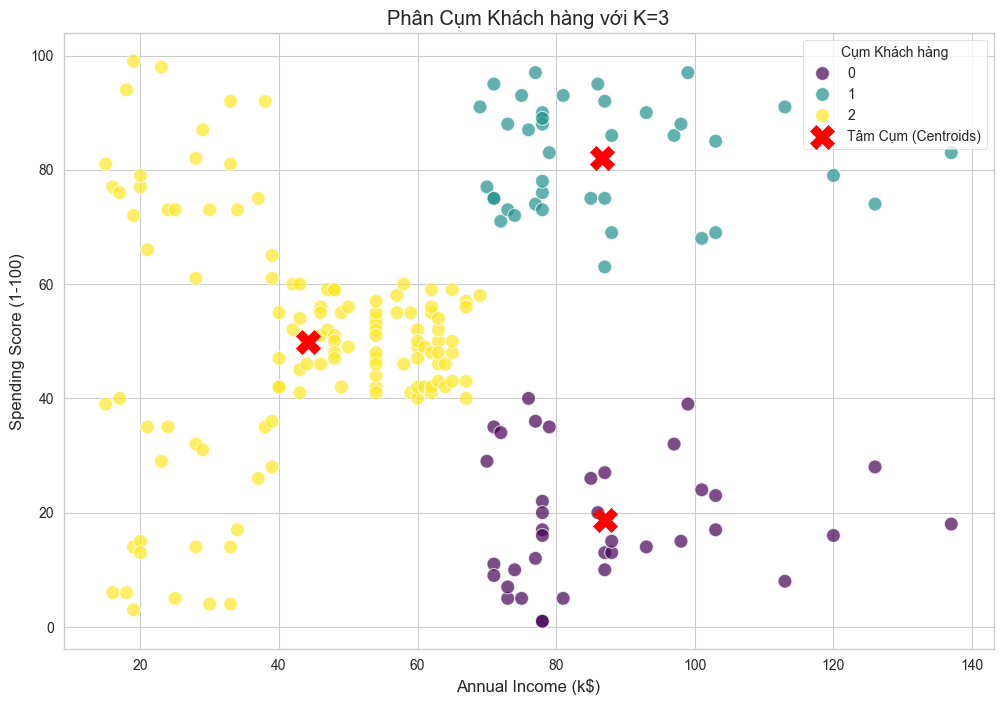

In [15]:
plot_clusters(
    data,
    'Cluster_k3',
    f'Phân Cụm Khách hàng với K={k3}',
    centers=kmeans_k3.cluster_centers_
)

**Nhận xét về phân cụm K=3:**

**Kết quả phân cụm:**
Phân cụm tạo ra **ba nhóm rõ ràng** theo mức thu nhập và mức chi tiêu, nhưng còn **khá thô**:

1. **Cụm 0 (Màu tím)**: Thu nhập cao – Chi tiêu thấp (~39 khách hàng)
2. **Cụm 1 (Màu xanh lá)**: Thu nhập cao – Chi tiêu cao (~35 khách hàng)  
3. **Cụm 2 (Màu vàng)**: Thu nhập thấp-trung bình – Chi tiêu phân tán (~81 khách hàng)

**Ưu điểm:**
- Cấu trúc nhìn ổn để **mô tả tổng quát** (High/Medium/Low)
- Đơn giản, dễ hiểu cho báo cáo cấp cao
- Hai cụm thu nhập cao (0 và 1) tách biệt khá rõ

**Hạn chế:**
- **Chưa đủ sắc nét** để hỗ trợ các chiến lược marketing chuyên sâh
- **Cụm 2 quá lớn** (81/200 = 40.5% tổng số khách hàng) và **không đồng nhất**:
  - Bao gồm cả thu nhập thấp-chi tiêu thấp (góc dưới bên trái)
  - Lẫn thu nhập thấp-chi tiêu cao (góc trên bên trái)
  - Và cả nhóm trung bình (giữa biểu đồ)
-  Mức độ phân tách còn **đơn giản**, chưa khai thác hết tiềm năng phân khúc
- Khó triển khai chiến lược riêng cho cụm 2 vì quá đa dạng

**Đánh giá:**
K=3 phù hợp cho **phân tích sơ bộ** nhưng cần tăng số cụm để có phân khúc chi tiết hơn, đặc biệt cần tách cụm 2 thành các nhóm nhỏ hơn với đặc điểm rõ ràng hơn.

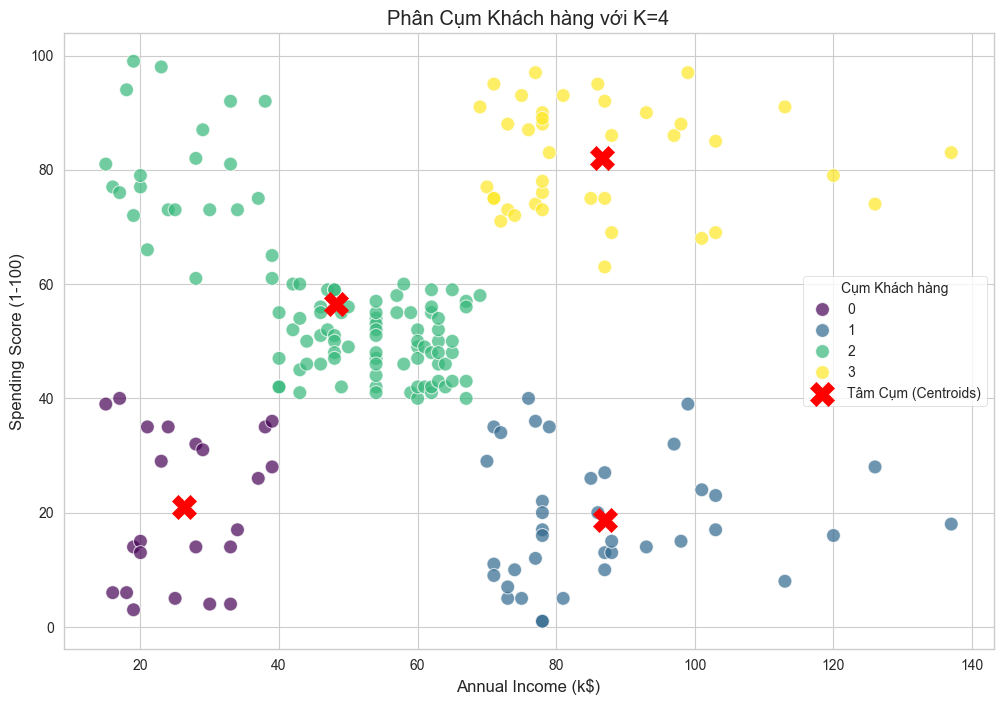

In [16]:
plot_clusters(
    data,
    'Cluster_k4',
    f'Phân Cụm Khách hàng với K={k4}',
    centers=kmeans_k4.cluster_centers_
)

**Nhận xét về phân cụm K=4:**

**Kết quả phân cụm:**
Cấu trúc cụm trở nên **sắc nét và hợp lý hơn** với 4 nhóm khách hàng rõ ràng:

1. **Cụm 0 (Màu tím)**: Thu nhập thấp – Chi tiêu thấp (~40 khách hàng)
   - **Đặc điểm**: Giá trị thấp, ổn định, ngân sách hạn chế
   - **Chiến lược**: Sản phẩm giá rẻ, khuyến mãi cơ bản

2. **Cụm 1 (Màu xanh dương)**: Thu nhập cao – Chi tiêu thấp (~39 khách hàng)
   - **Đặc điểm**: Khách tiết kiệm, khó chuyển đổi dù có thu nhập tốt
   - **Chiến lược**: Value proposition, chương trình loyalty dài hạn

3. **Cụm 2 (Màu xanh lá)**: Thu nhập trung bình – Chi tiêu trung bình (~79 khách hàng)
   - **Đặc điểm**: Phân khúc đại trà, cân bằng thu nhập và chi tiêu
   - **Chiến lược**: Sản phẩm chất lượng trung cấp, giá hợp lý

4. **Cụm 3 (Màu vàng)**: Thu nhập cao – Chi tiêu cao (~42 khách hàng)
   - **Đặc điểm**: Khách VIP, chi tiêu mạnh tay, mang lại doanh thu cao
   - **Chiến lược**: Sản phẩm cao cấp, dịch vụ VIP, chăm sóc đặc biệt

**Ưu điểm:**
- **Các nhóm có ranh giới rõ**, tách biệt tốt với ít chồng lấp
- **Mang lại insight thực sự hữu ích** cho phân khúc khách hàng
- **Kích thước cụm cân bằng**: Không có cụm quá nhỏ hoặc quá lớn
- **4 chiến lược marketing riêng biệt** dễ triển khai:
  - Budget (Cụm 0)
  - Value (Cụm 1) 
  - Quality (Cụm 2)
  - Premium (Cụm 3)
- **Centroids rõ ràng**: Các tâm cụm (X đỏ) nằm đúng trung tâm mỗi nhóm

**Đánh giá:**
**Đây là mức phân cụm hợp lý** về mặt kỹ thuật và nghiệp vụ. K=4 cung cấp độ chi tiết vừa đủ để hiểu rõ từng phân khúc mà không quá phức tạp để triển khai chiến lược marketing.

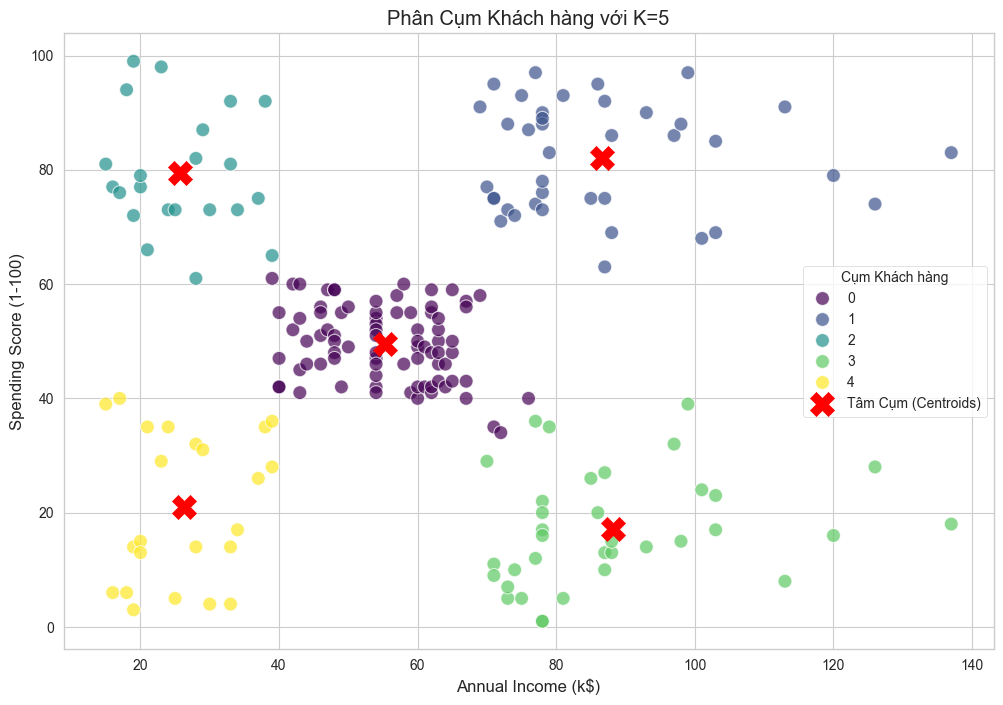

In [17]:
plot_clusters(
    data,
    'Cluster_k5',
    f'Phân Cụm Khách hàng với K={k5}',
    centers=kmeans_k5.cluster_centers_
)

**Nhận xét về phân cụm K=5:**

**Kết quả phân cụm:**
Phân cụm tạo ra 5 nhóm với độ chi tiết cao hơn:

1. **Cụm 0 (Màu tím)**: Thu nhập trung bình – Chi tiêu trung bình (~81 khách hàng)
   - **Đặc điểm**: Phân khúc đại trà, cân bằng
   - **Chiến lược**: Sản phẩm chất lượng trung cấp

2. **Cụm 1 (Màu xanh dương nhạt)**: Thu nhập cao – Chi tiêu cao (~35 khách hàng)
   - **Đặc điểm**: VIP thu nhập cao, chi tiêu mạnh
   - **Chiến lược**: Sản phẩm cao cấp, dịch vụ VIP

3. **Cụm 2 (Màu xanh lá cây)**: Thu nhập thấp – Chi tiêu cao (~23 khách hàng)
   - **Đặc điểm**: Chi tiêu vượt khả năng, mua theo cảm xúc
   - **Chiến lược**: Credit, trả góp, chiến dịch ngắn hạn

4. **Cụm 3 (Màu xanh lục)**: Thu nhập cao – Chi tiêu thấp (~35 khách hàng)
   - **Đặc điểm**: Thu nhập cao nhưng tiết kiệm
   - **Chiến lược**: Value proposition, chương trình loyalty

5. **Cụm 4 (Màu vàng)**: Thu nhập thấp – Chi tiêu thấp (~26 khách hàng)
   - **Đặc điểm**: Phân khúc bình dân, ngân sách hạn chế
   - **Chiến lược**: Sản phẩm giá rẻ, khuyến mãi

**Ưu điểm:**
- **Phân tách chi tiết và sắc nét nhất**: 5 cụm tách biệt rõ ràng theo đặc điểm
- **Tách biệt cụm thu nhập thấp-chi tiêu cao** (Cụm 2) - nhóm đặc biệt thú vị và có tiềm năng cao
- **Insight sâu sắc**: Phân tích chi tiết 5 phân khúc khác biệt hoàn toàn
- **Chính xác hơn**: Mỗi cụm có đặc điểm rõ ràng, không bị gộp chung
- **Tối ưu cho personalization**: Cho phép tùy chỉnh chiến lược marketing sâu cho từng nhóm
- **Phát hiện insight mới**: 
  - Cụm 2 (thu nhập thấp-chi tiêu cao) - cơ hội cho credit/trả góp
  - Cụm 3 (thu nhập cao-chi tiêu thấp) - tiềm năng chuyển đổi lớn

---

**SO SÁNH K=3, K=4 VÀ K=5:**

| **Tiêu chí** | **K=3** | **K=4** | **K=5** |
|---|---|---|---|
| **Độ phân tách** | Thô, cụm 2 quá lớn | Rõ ràng, cân bằng | **Chi tiết và sắc nét nhất** |
| **Kích thước cụm** | Không đều (35-81 KH) | Cân bằng (39-79 KH) | Đa dạng (23-81 KH) |
| **Độ chi tiết** | Đơn giản, thiếu sâu | Vừa đủ | **Phân tích sâu nhất** |
| **Insight nghiệp vụ** | Tổng quát | Rõ ràng, hữu ích | **Chi tiết, chính xác cao** |
| **Phát hiện insight mới** | Không | Có | **Nhiều nhất (Cụm 2, 3)** |
| **Khả năng personalization** | Thấp | Trung bình | **Cao nhất** |

**KẾT LUẬN:**

**K=5 là lựa chọn tối ưu nhất** vì:

1. **Chi tiết và chính xác nhất**: 5 phân khúc rõ ràng với đặc điểm riêng biệt
2. **Insight sâu sắc**: Phát hiện được nhóm khách hàng đặc biệt (Cụm 2, 3)
3. **Tối ưu cho marketing hiện đại**: Phù hợp với xu hướng personalization
4. **ROI tiềm năng cao**: Mỗi cụm có chiến lược riêng, tối ưu conversion
5. **Không bỏ sót insight**: Tách được các nhóm nhỏ nhưng quan trọng

**K=4 có thể phù hợp nếu:**
- Doanh nghiệp nhỏ với đội ngũ marketing hạn chế
- Ngân sách marketing thấp
- Muốn triển khai nhanh với độ phức tạp thấp

**Quyết định: Sử dụng K=5 cho phân khúc khách hàng chi tiết và chính xác nhất.**